# import libraries

In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from sklearn.metrics import roc_curve

In [3]:
from tensorflow.keras.metrics import AUC,Precision

# import data

In [4]:
path = 'images'

In [5]:
#dataset api by tensorflow
data=tf.keras.utils.image_dataset_from_directory(path,batch_size=32)

Found 480 files belonging to 2 classes.


In [6]:
categories = data.class_names
print(categories)

['happy', 'sad']


In [7]:
#Read the data points and store them in image batches(ibatch)
iterator = data.as_numpy_iterator()
ibatch = iterator.next()

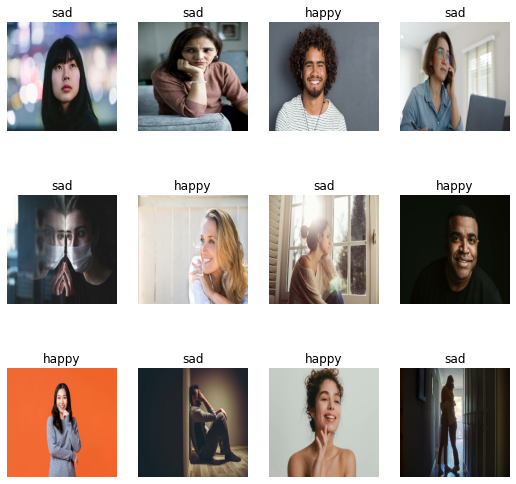

In [8]:
#try to visualise the images based on their labels
plt.figure(figsize=(9, 9))
for images, labels in data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[labels[i]])
    plt.axis("off")

In [9]:
precision = Precision()

# preprocessing the data

In [10]:
#since we are dealing with 3 channel RGB image data set we need to normalize the values from 255 to lower for easy and fast processing
data = data.map(lambda x,y: (x/255, y))

In [11]:
norm=data.as_numpy_iterator()

In [12]:
ibatch=norm.next()

In [13]:
#print minimum and maximum values
print("minimum = ",np.min(ibatch[0]))
print("maximum= ",np.max(ibatch[0]))

minimum =  0.0
maximum=  1.0


# train and test the data

In [14]:
#data.as_numpy_iterator().next()

In [15]:
len(data)

15

In [16]:
train_split=int(len(data)*.6)
val_split=int(len(data)*.2)
test_split=int(len(data)*.2)

In [17]:
train_split+val_split+test_split

15

In [18]:
#Split the data into train test and validation image sets
train = data.take(train_split)
val = data.skip(train_split).take(val_split)
test = data.skip(train_split+val_split).take(test_split)

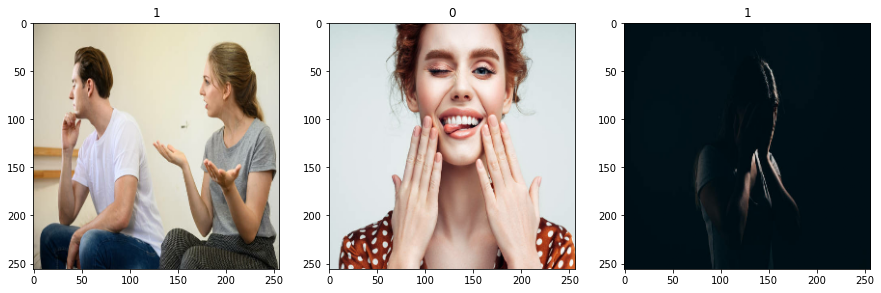

In [19]:
#visualise the images and their corresponding labels from the image batch
fig, axes = plt.subplots(ncols=3, figsize=(15,15))
for i, image in enumerate(ibatch[0][:3]):
    axes[i].imshow(image)
    axes[i].title.set_text(ibatch[1][i])

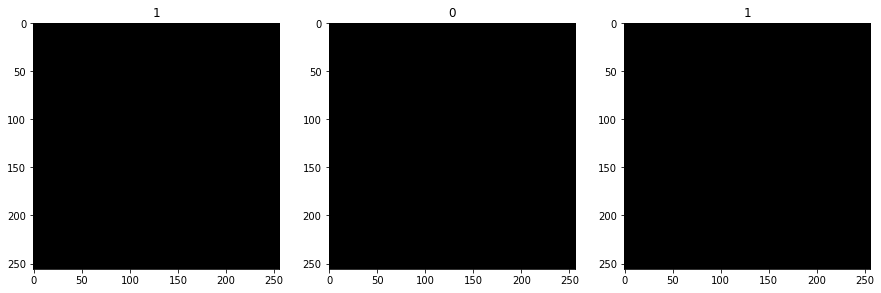

In [20]:
fig, axes = plt.subplots(ncols=3, figsize=(15,15))
for i, image in enumerate(ibatch[0][:3]):
    axes[i].imshow(image.astype("int"))
    axes[i].title.set_text(ibatch[1][i])

# Relu

In [21]:
#add conv layers and pool the layers using maxpooling
model1 = Sequential()

model1.add(Conv2D(16, (5,5), 1, activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, (5,5), 1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(16, (5,5), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model1.fit(train, epochs=45, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/45
9/9 [==============================] - 13s 1s/step - loss: 0.7880 - accuracy: 0.5174 - val_loss: 0.6728 - val_accuracy: 0.7396
Epoch 2/45
9/9 [==============================] - 13s 1s/step - loss: 0.6739 - accuracy: 0.6007 - val_loss: 0.6584 - val_accuracy: 0.6250
Epoch 3/45
9/9 [==============================] - 13s 1s/step - loss: 0.6266 - accuracy: 0.6840 - val_loss: 0.5673 - val_accuracy: 0.6979
Epoch 4/45
9/9 [==============================] - 13s 1s/step - loss: 0.6225 - accuracy: 0.7049 - val_loss: 0.5909 - val_accuracy: 0.6354
Epoch 5/45
9/9 [==============================] - 13s 1s/step - loss: 0.6310 - accuracy: 0.6875 - val_loss: 0.5865 - val_accuracy: 0.7500
Epoch 6/45
9/9 [==============================] - 13s 1s/step - loss: 0.6264 - accuracy: 0.7292 - val_loss: 0.5234 - val_accuracy: 0.8021
Epoch 7/45
9/9 [==============================] - 13s 1s/step - loss: 0.5653 - accuracy: 0.7257 - val_loss: 0.5287 - val_accuracy: 0.7188
Epoch 8/45
9/9 [==================

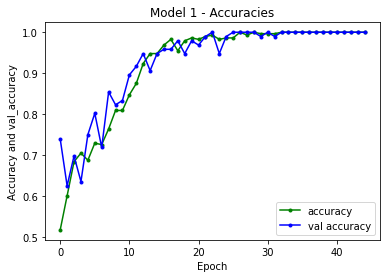

In [23]:
accuracy1=hist.history['accuracy']
validation_accuracy1 = hist.history['val_accuracy']
    
fig = plt.figure()
plt.plot(accuracy1, color='green',label='accuracy',marker='.')
plt.plot(validation_accuracy1,color='blue',label='val accuracy',marker='.')
plt.title('Model 1 - Accuracies', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy and val_accuracy')
plt.legend(loc="lower right")
plt.show()

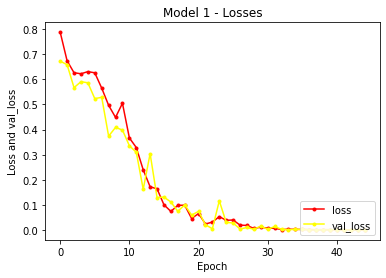

In [24]:
loss1=hist.history['loss']
validation_loss1=hist.history['val_loss']

fig = plt.figure()
plt.plot(loss1, color='red', label='loss',marker='.')
plt.plot(validation_loss1, color='yellow', label='val_loss',marker='.')
plt.title('Model 1 - Losses', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss and val_loss')
plt.legend(loc="lower right")
plt.show()

# sigmoid

In [25]:
model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='sigmoid', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, (3,3), 1, activation='sigmoid'))
model2.add(MaxPooling2D())
# model2.add(Conv2D(32, (3,3), 1, activation='sigmoid'))
# model2.add(MaxPooling2D())
# model2.add(Conv2D(32, (3,3), 1, activation='sigmoid'))
# model2.add(MaxPooling2D())
model2.add(Conv2D(16, (3,3), 1, activation='sigmoid'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256, activation='sigmoid'))
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(1, activation='relu'))

In [26]:
model2.compile('adam', loss=tf.losses.MeanSquaredError(), metrics=['accuracy'])

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model2.fit(train, epochs=45, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/45
9/9 [==============================] - 9s 857ms/step - loss: 0.4931 - accuracy: 0.5069 - val_loss: 0.4792 - val_accuracy: 0.5208
Epoch 2/45
9/9 [==============================] - 8s 859ms/step - loss: 0.5104 - accuracy: 0.4896 - val_loss: 0.3958 - val_accuracy: 0.6042
Epoch 3/45
9/9 [==============================] - 8s 846ms/step - loss: 0.5556 - accuracy: 0.4444 - val_loss: 0.4896 - val_accuracy: 0.5104
Epoch 4/45
9/9 [==============================] - 8s 845ms/step - loss: 0.5347 - accuracy: 0.4653 - val_loss: 0.4062 - val_accuracy: 0.5938
Epoch 5/45
9/9 [==============================] - 8s 847ms/step - loss: 0.5278 - accuracy: 0.4722 - val_loss: 0.5521 - val_accuracy: 0.4479
Epoch 6/45
9/9 [==============================] - 9s 980ms/step - loss: 0.4965 - accuracy: 0.5035 - val_loss: 0.5312 - val_accuracy: 0.4688
Epoch 7/45
9/9 [==============================] - 8s 836ms/step - loss: 0.4965 - accuracy: 0.5035 - val_loss: 0.4479 - val_accuracy: 0.5521
Epoch 8/45
9/9 [====

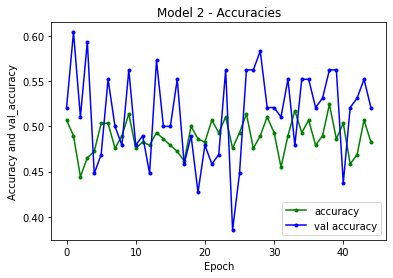

In [28]:
accuracy2=hist.history['accuracy']
validation_accuracy2 = hist.history['val_accuracy']
    
fig = plt.figure()
plt.plot(accuracy2, color='green',label='accuracy',marker='.')
plt.plot(validation_accuracy2,color='blue',label='val accuracy',marker='.')
plt.title('Model 2 - Accuracies', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy and val_accuracy')
plt.legend(loc="lower right")
plt.show()

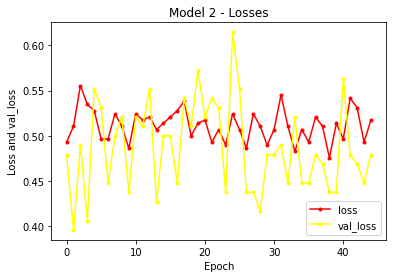

In [29]:
loss2=hist.history['loss']
validation_loss2=hist.history['val_loss']

fig = plt.figure()
plt.plot(loss2 ,color='red', label='loss',marker='.')
plt.plot(validation_loss2, color='yellow', label='val_loss',marker='.')
plt.title('Model 2 - Losses', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss and val_loss')
plt.legend(loc="lower right")
plt.show()

# Final with tanh

In [30]:
model3 = Sequential()
model3.add(Conv2D(8, (3,3), 1, activation='tanh', input_shape=(256,256,3)))
model3.add(MaxPooling2D())
model3.add(Conv2D(16, (3,3), 1, activation='tanh'))
model3.add(MaxPooling2D())
model3.add(Conv2D(32, (3,3), 1, activation='tanh'))
model3.add(MaxPooling2D())
model3.add(Conv2D(8, (3,3), 1, activation='tanh'))
model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile('SGD', loss=tf.losses.MeanSquaredError(), metrics=['accuracy'])

In [31]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model3.fit(train, epochs=45, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/45
9/9 [==============================] - 8s 754ms/step - loss: 0.2511 - accuracy: 0.5139 - val_loss: 0.2509 - val_accuracy: 0.4792
Epoch 2/45
9/9 [==============================] - 7s 738ms/step - loss: 0.2479 - accuracy: 0.5660 - val_loss: 0.2493 - val_accuracy: 0.4896
Epoch 3/45
9/9 [==============================] - 7s 735ms/step - loss: 0.2470 - accuracy: 0.5312 - val_loss: 0.2449 - val_accuracy: 0.5833
Epoch 4/45
9/9 [==============================] - 7s 753ms/step - loss: 0.2464 - accuracy: 0.5521 - val_loss: 0.2466 - val_accuracy: 0.5521
Epoch 5/45
9/9 [==============================] - 7s 745ms/step - loss: 0.2451 - accuracy: 0.5694 - val_loss: 0.2409 - val_accuracy: 0.6250
Epoch 6/45
9/9 [==============================] - 7s 740ms/step - loss: 0.2446 - accuracy: 0.5556 - val_loss: 0.2438 - val_accuracy: 0.5729
Epoch 7/45
9/9 [==============================] - 7s 738ms/step - loss: 0.2405 - accuracy: 0.5729 - val_loss: 0.2345 - val_accuracy: 0.6146
Epoch 8/45
9/9 [====

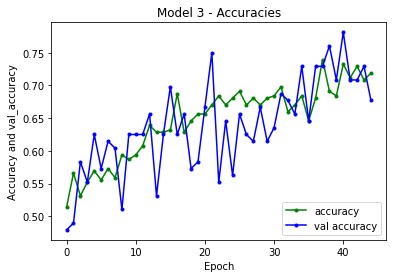

In [32]:
accuracy3=hist.history['accuracy']
validation_accuracy3 = hist.history['val_accuracy']
    
fig = plt.figure()
plt.plot(accuracy3, color='green',label='accuracy',marker='.')
plt.plot(validation_accuracy3,color='blue',label='val accuracy',marker='.')
plt.title('Model 3 - Accuracies', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy and val_accuracy')
plt.legend(loc="lower right")
plt.show()

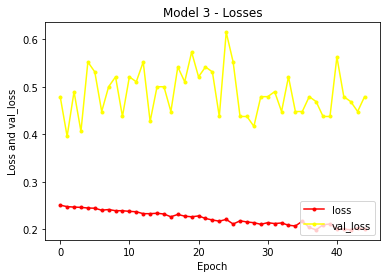

In [33]:
loss3=hist.history['loss']
validation_loss3=hist.history['val_loss']

fig = plt.figure()
plt.plot(loss3 ,color='red', label='loss',marker='.')
plt.plot(validation_loss2, color='yellow', label='val_loss',marker='.')
plt.title('Model 3 - Losses', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss and val_loss')
plt.legend(loc="lower right")
plt.show()

# Accuracy and loss tendencies

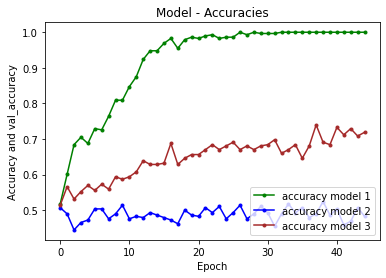

In [34]:
fig = plt.figure()
plt.plot(accuracy1, color='green',label='accuracy model 1',marker='.')
plt.plot(accuracy2, color='blue',label='accuracy model 2',marker='.')
plt.plot(accuracy3, color='brown',label='accuracy model 3',marker='.')
plt.title('Model - Accuracies', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy and val_accuracy')
plt.legend(loc="lower right")
plt.show()

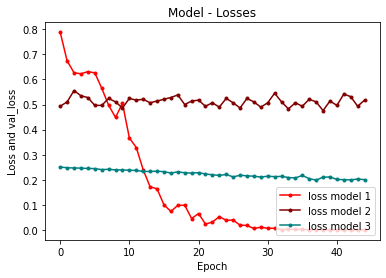

In [35]:
fig = plt.figure()
plt.plot(loss1 ,color='red', label='loss model 1',marker='.')
plt.plot(loss2 ,color='maroon', label='loss model 2',marker='.')
plt.plot(loss3 ,color='teal', label='loss model 3',marker='.')
plt.title('Model - Losses', fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss and val_loss')
plt.legend(loc="lower right")
plt.show()

# Evaluation

In [36]:
auc=AUC()
for values in test.as_numpy_iterator():
    x,y=values
    pred_y1=model1.predict(x)
    fpr1,tpr1,thresholds1=roc_curve(y,pred_y1)

1/1 [==============================] - 0s 239ms/step


In [37]:
for values in test.as_numpy_iterator():
    x,y=values
    pred_y2=model2.predict(x)
    fpr2,tpr2,thresholds2=roc_curve(y,pred_y2)

1/1 [==============================] - 0s 171ms/step


In [38]:
for values in test.as_numpy_iterator():
    x,y=values
    pred_y3=model3.predict(x)
    fpr3,tpr3,thresholds3=roc_curve(y,pred_y3)

1/1 [==============================] - 0s 133ms/step


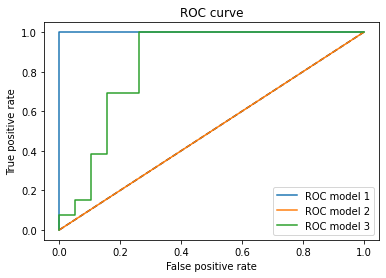

In [39]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='ROC model 1')
plt.plot(fpr2, tpr2, label='ROC model 2')
plt.plot(fpr3, tpr3, label='ROC model 3')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [40]:
for values in test.as_numpy_iterator():
    x,y=values
    pred_y1=model1.predict(x)
    pred_y2=model2.predict(x)
    pred_y3=model3.predict(x)
    auc1=auc(y,pred_y1)
    auc2=auc(y,pred_y2)
    auc3=auc(y,pred_y3)

1/1 [==============================] - 0s 170ms/step


In [41]:
print('Model 1= {:.2f}%'.format((auc1.numpy())*100))
print('Model 2= {:.2f}%'.format((auc2.numpy())*100))
print('Model 3= {:.2f}%'.format((auc3.numpy())*100))

Model 1= 79.23%
Model 2= 75.20%
Model 3= 75.11%


# prediction

In [42]:
for ibatch in test.as_numpy_iterator(): 
    x, y = ibatch
    pred = model1.predict(x)
    precision.update_state(y, pred)

1/1 [==============================] - 0s 388ms/step


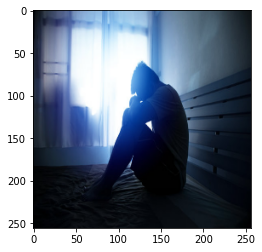

In [43]:
img = cv2.imread('sad-test2.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
pred1=model1.predict(np.expand_dims(resize/255, 0))
pred1[0]

1/1 [==============================] - 0s 103ms/step


array([0.99969846], dtype=float32)

In [45]:
if pred1 > 0.6: 
    print(f'Sad Image prediction')
else:
    print(f'Happy Image prediction')

Sad Image prediction
